In [36]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [38]:
# Load dataset
df = pd.read_csv("congressEW.csv")

In [40]:
# Preview dataset
print(df.head())

  class name  handicapped infants WPCS AOBR PFF ESA RGIS ASTB ATNC MM  \
0  republican                   n    y    n   y   y    y    n    n  n   
1  republican                   n    y    n   y   y    y    n    n  n   
2    democrat                   ?    y    y   ?   y    y    n    n  n   
3    democrat                   n    y    y   n   ?    y    n    n  n   
4    democrat                   y    y    y   n   y    y    n    n  n   

  IMMIGRA. SCC ES SRTU CRIME DFE EAASA  
0        y   ?  y    y     y   n     y  
1        n   n  y    y     y   n     ?  
2        n   y  n    y     y   n     n  
3        n   y  n    y     n   n     y  
4        n   y  ?    y     y   y     y  


In [42]:
# Encode categorical features
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns

In [44]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

In [46]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [48]:
# Generate linkage matrix
linked = linkage(scaled_data, method='ward')

In [50]:
# Apply Agglomerative Clustering
hac = AgglomerativeClustering(n_clusters=2, linkage='ward')
clusters = hac.fit_predict(scaled_data)

In [52]:
# Add clusters to DataFrame
df['cluster'] = clusters

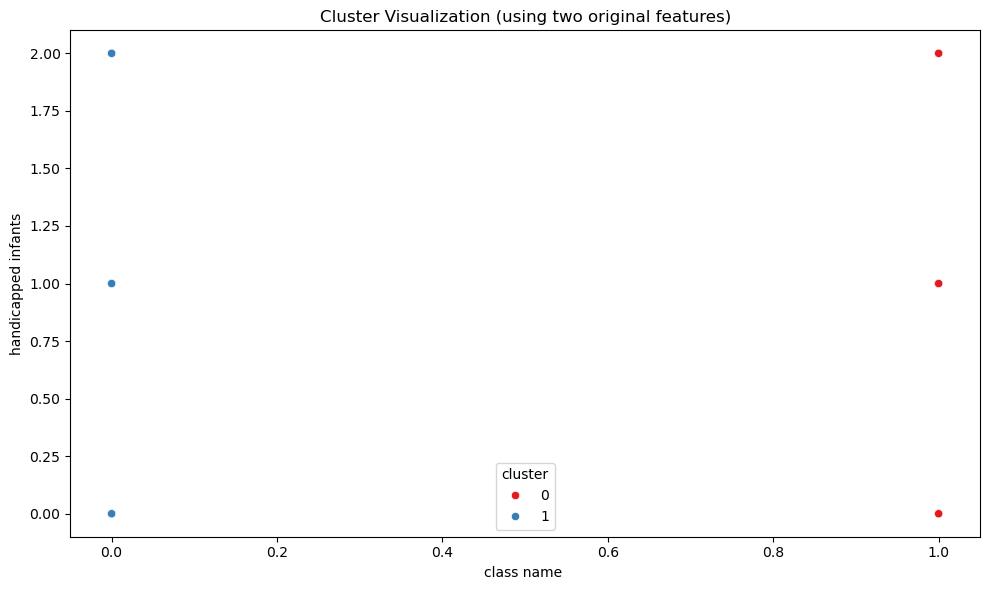

In [54]:
# Visualize clusters using two original features (you can choose appropriate ones)
# Here we assume the first two columns are suitable for plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df.columns[0], y=df.columns[1], hue='cluster', palette='Set1')
plt.title('Cluster Visualization (using two original features)')
plt.tight_layout()
plt.show()

In [77]:
print("Yes" if pd.read_csv("congressEW.csv").equals(df.drop(columns=['cluster'])) else "No")

No


In [81]:
# Count number of items in each cluster
cluster_counts = df['cluster'].value_counts().sort_index()
print("Number of samples in each cluster:")
print(cluster_counts)

Number of samples in each cluster:
cluster
0    231
1    204
Name: count, dtype: int64


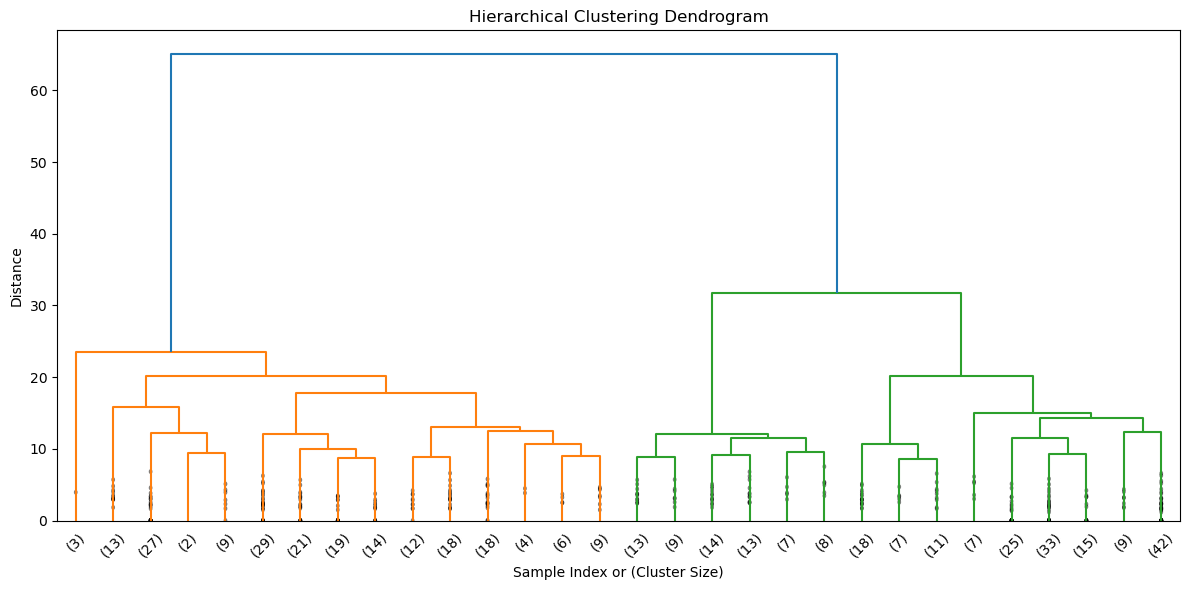

In [31]:
# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=30, show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()
